In [4]:
import uproot
input_tree_md = uproot.open({"/work/guenther/reco_tuner/data/param_data_MD_selected.root": "Selected"})
input_tree_mu = uproot.open({"/work/guenther/reco_tuner/data/param_data_MU_selected.root": "Selected"})
    # this is an event list of dictionaries containing awkward arrays
array_md = input_tree_md.arrays()
array_mu = input_tree_mu.arrays()

/work/guenther/reco_tuner/env/tuner_env/envs/tuner/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


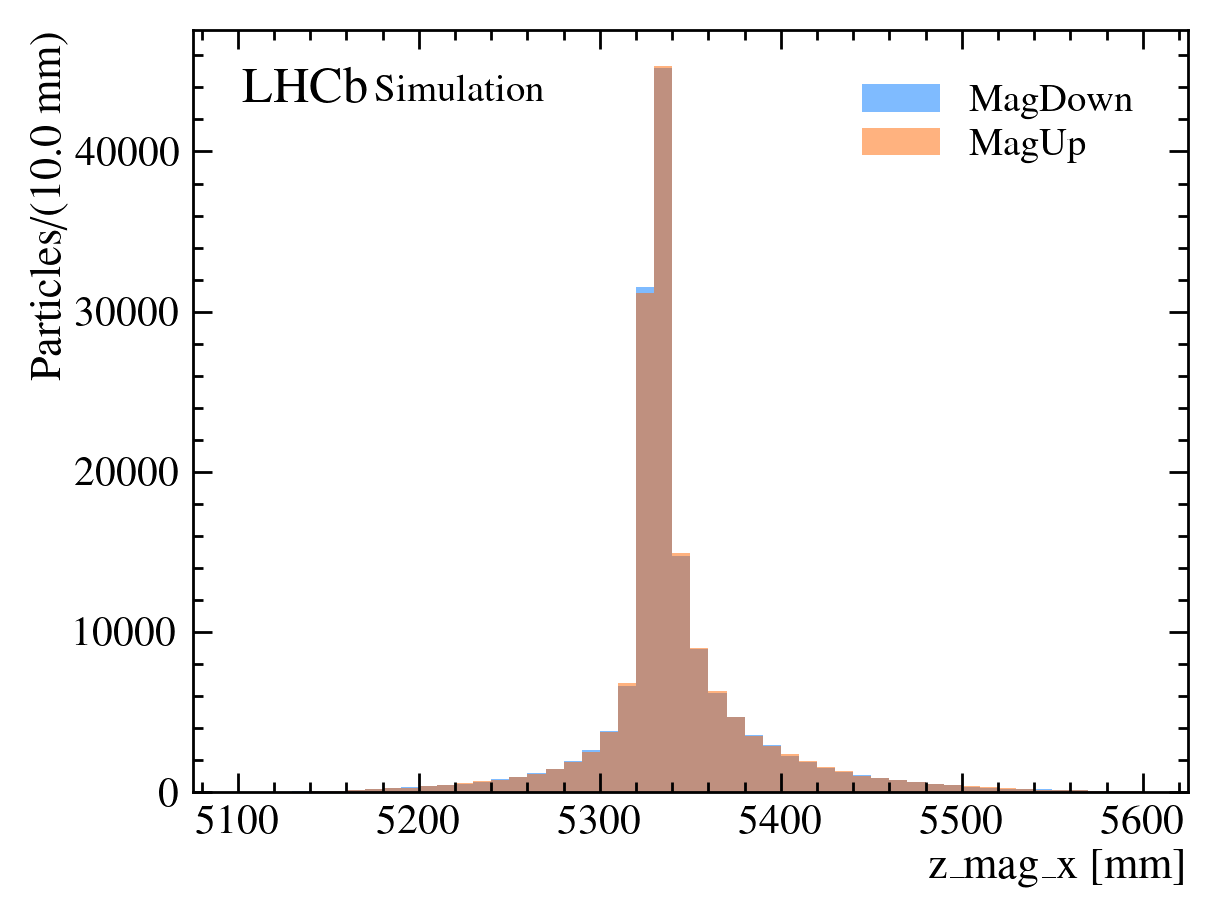

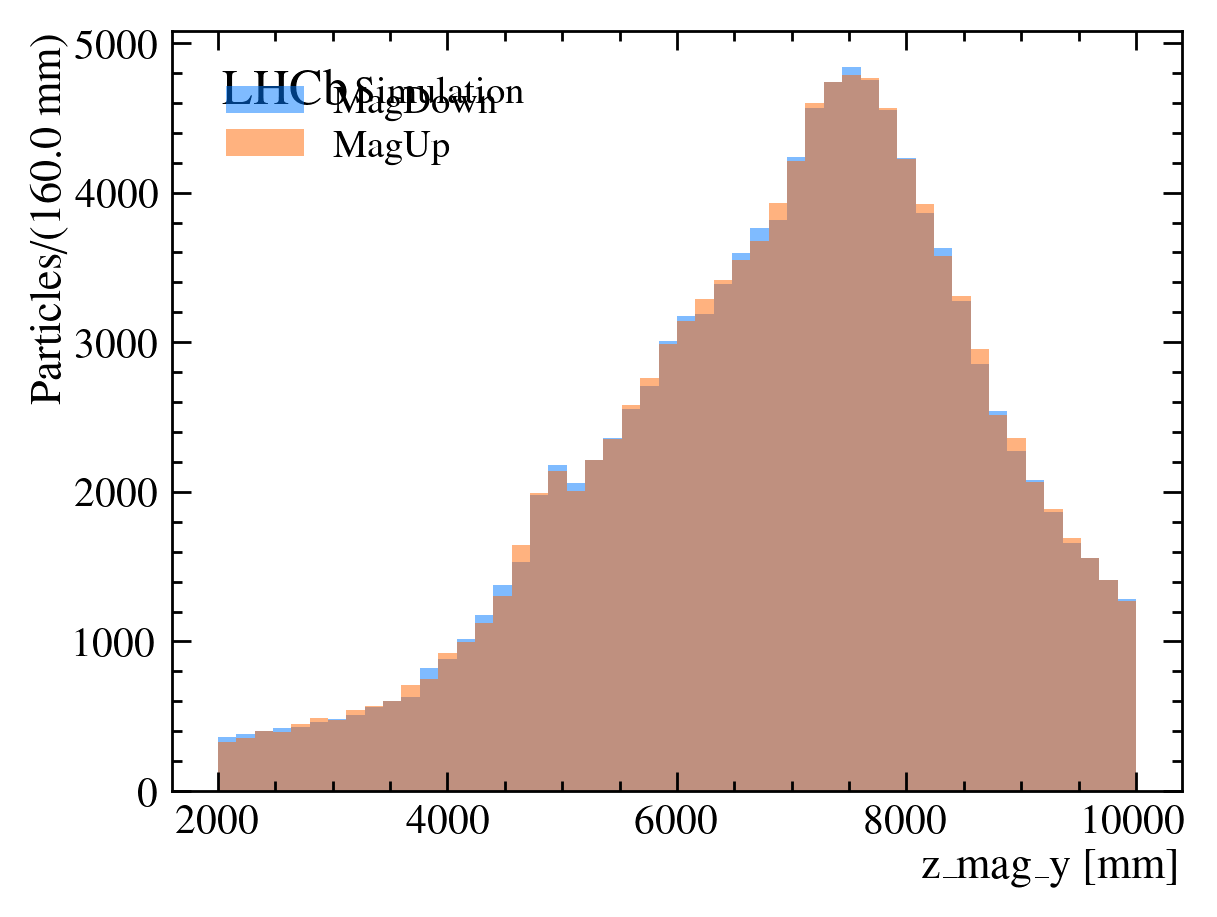

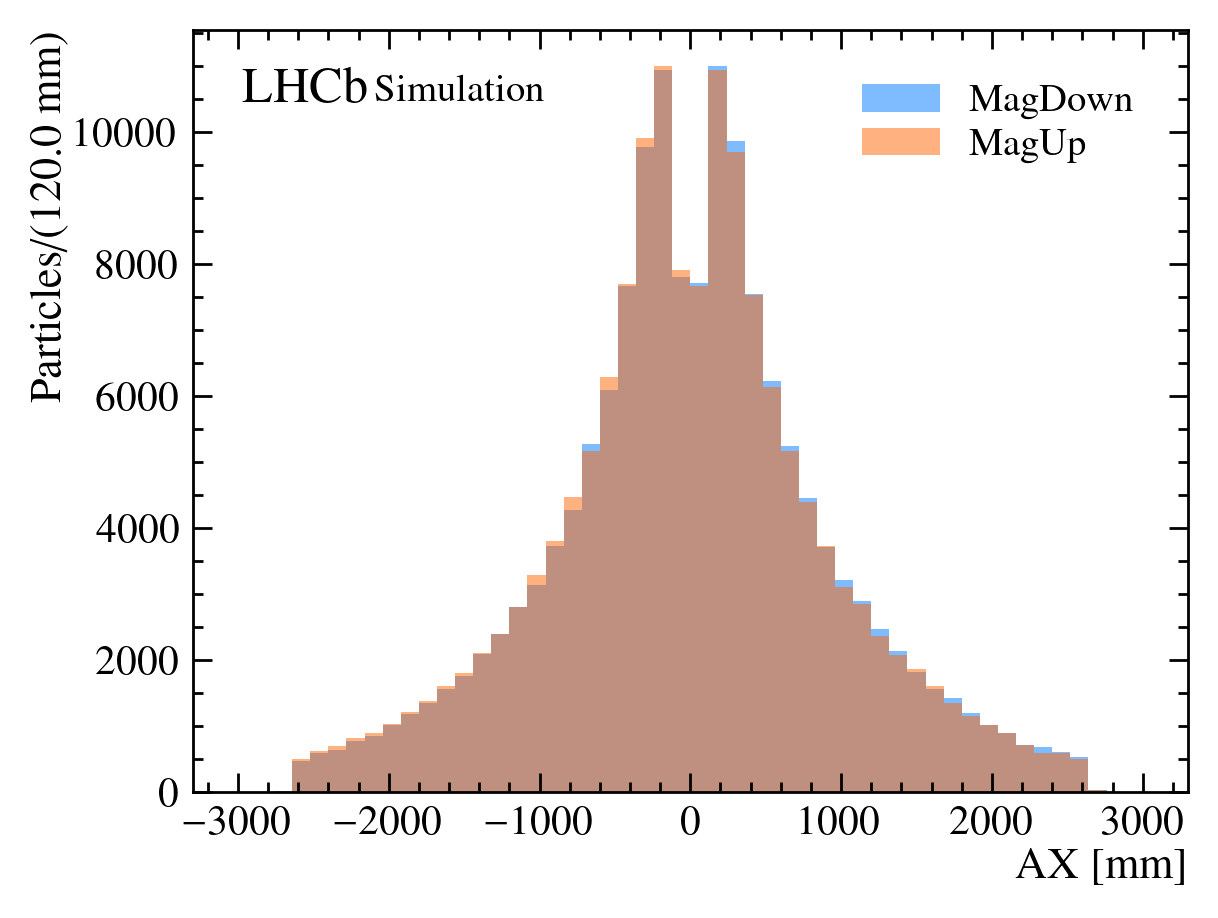

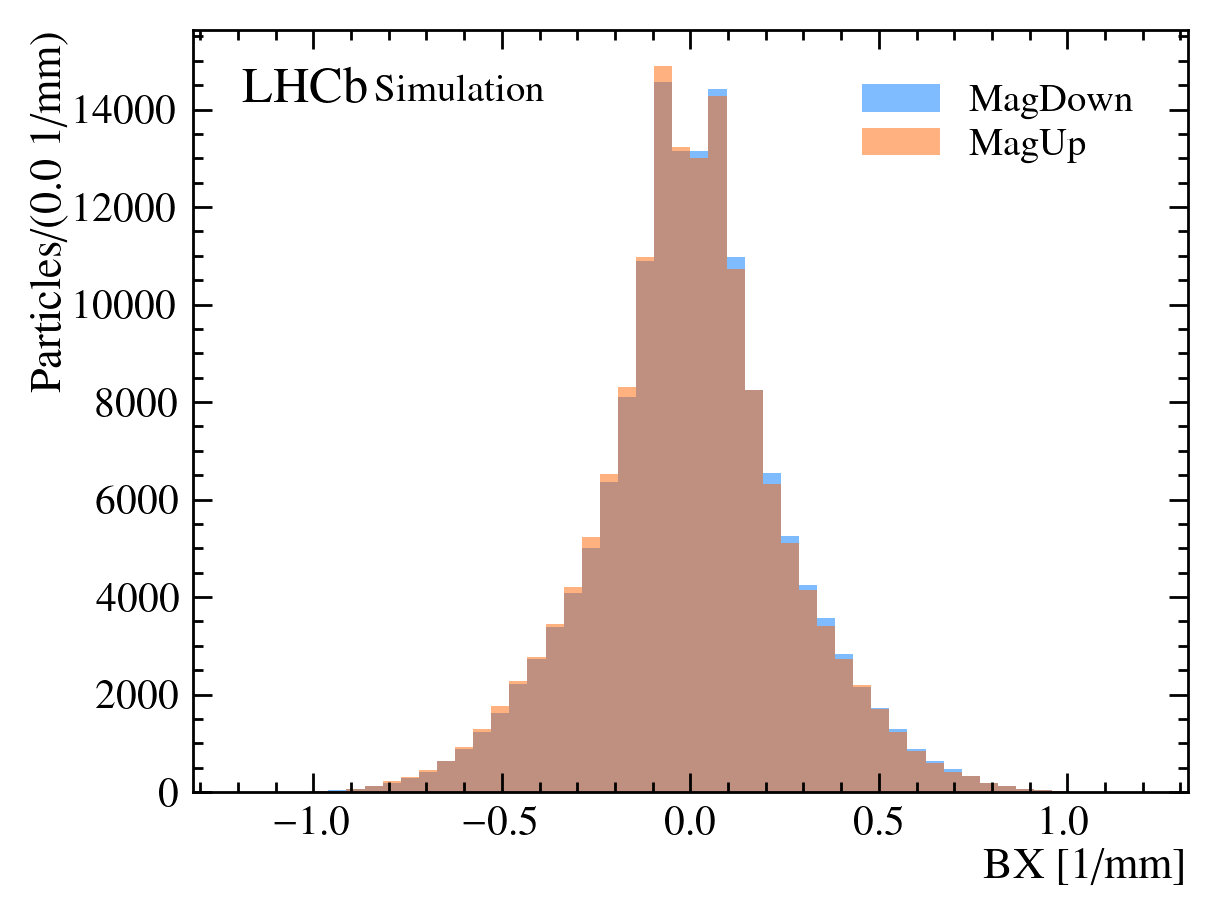

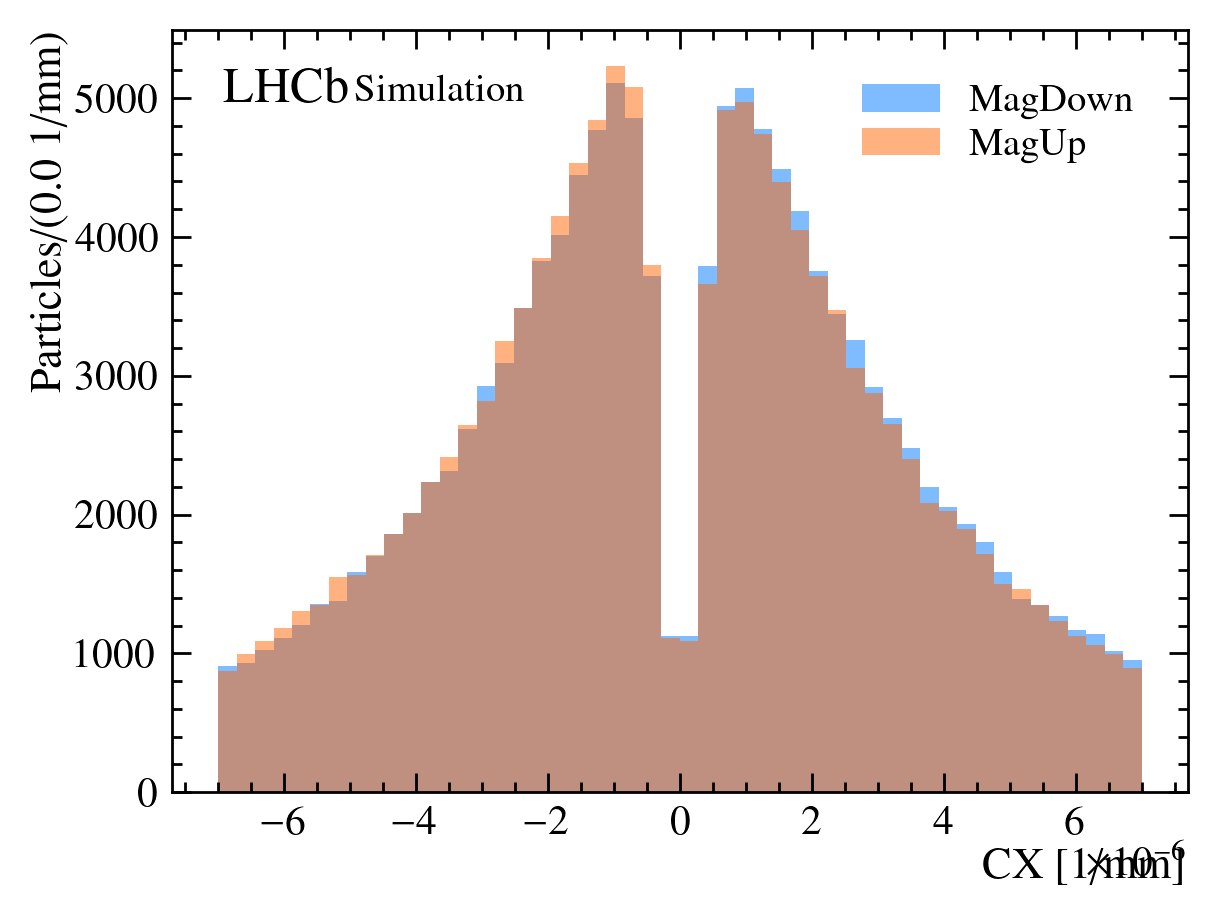

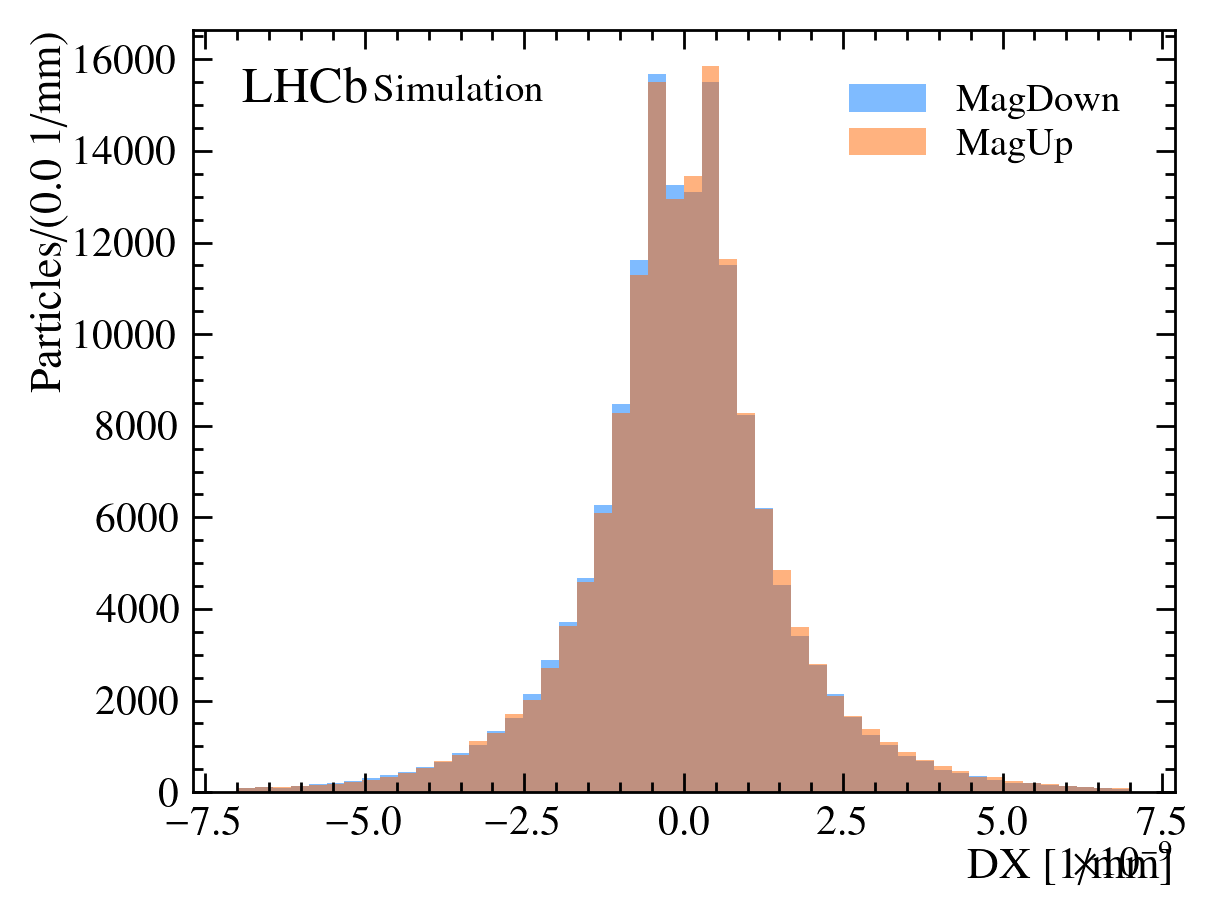

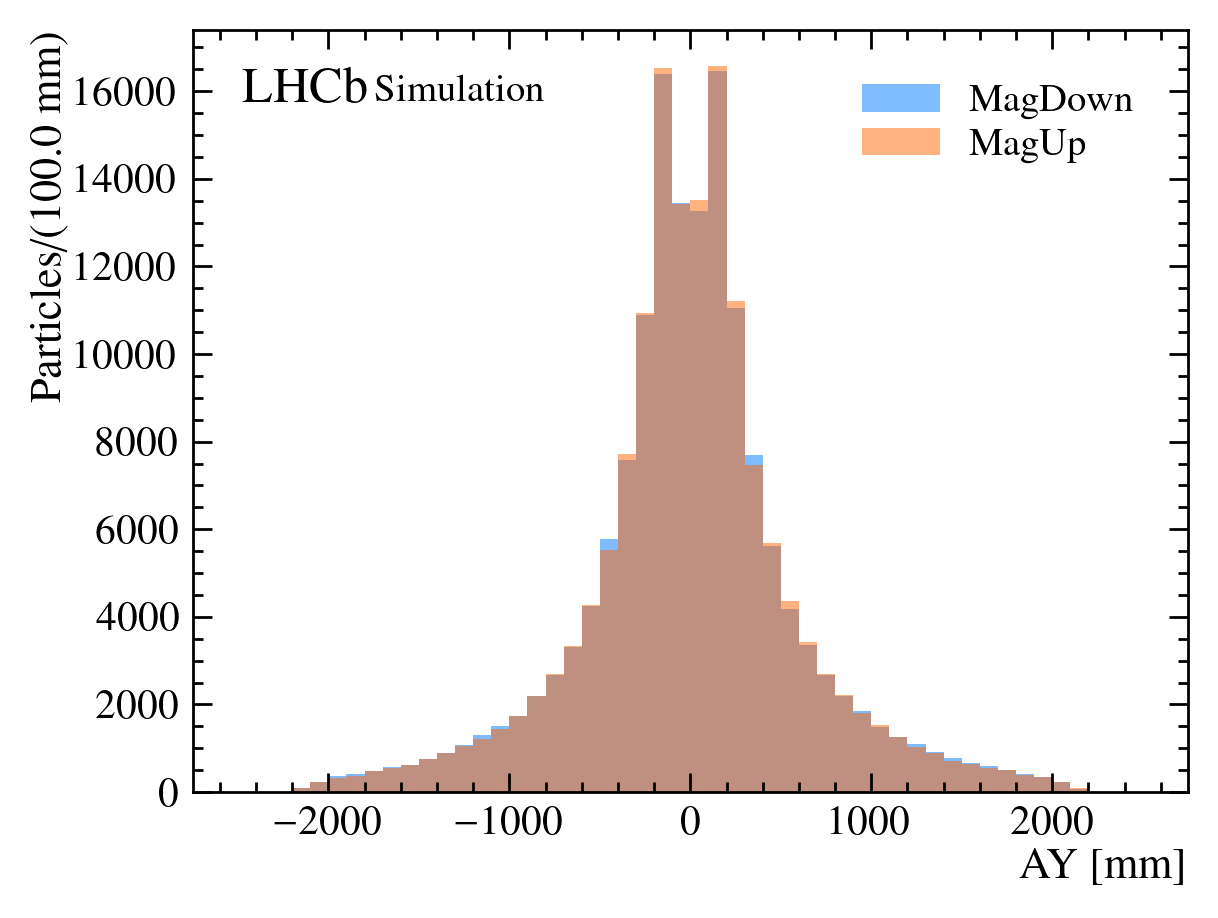

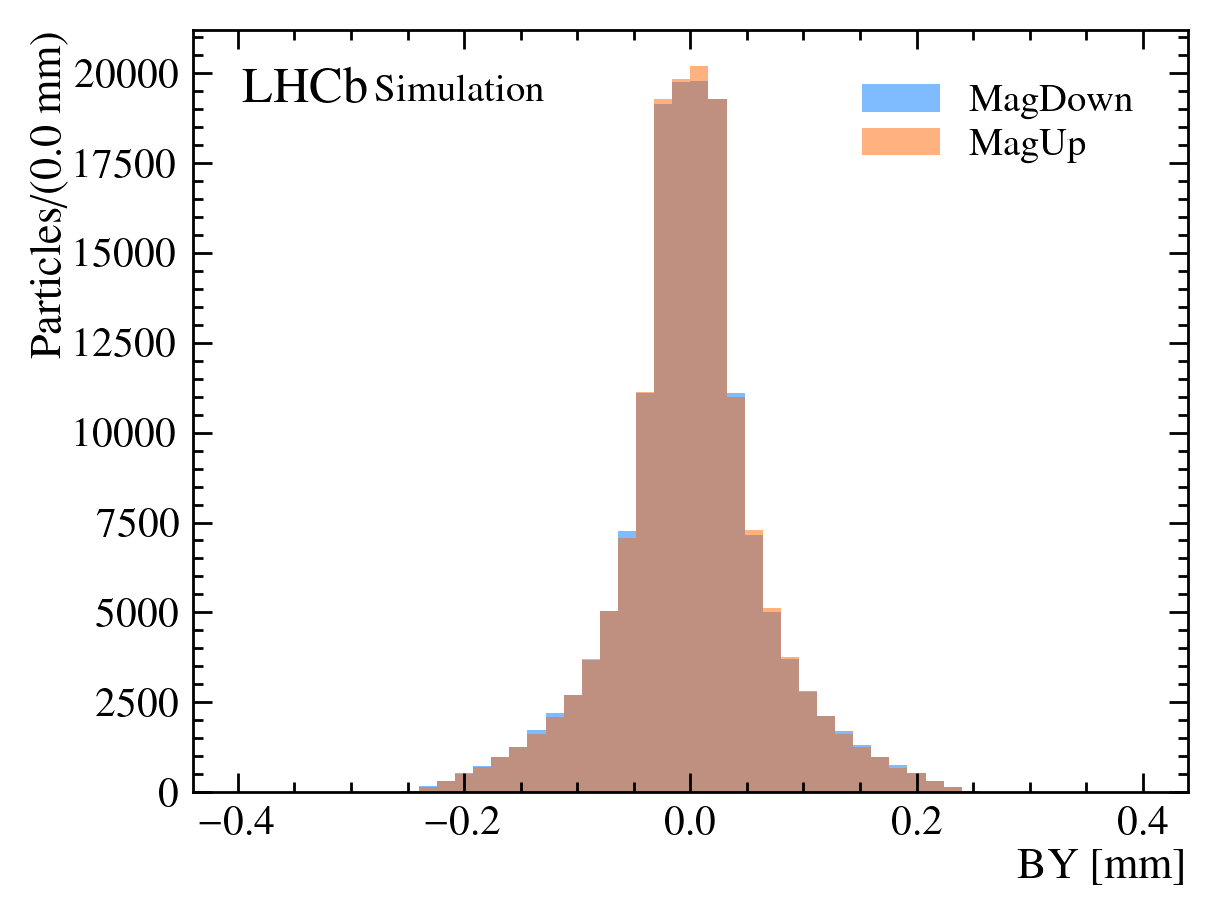

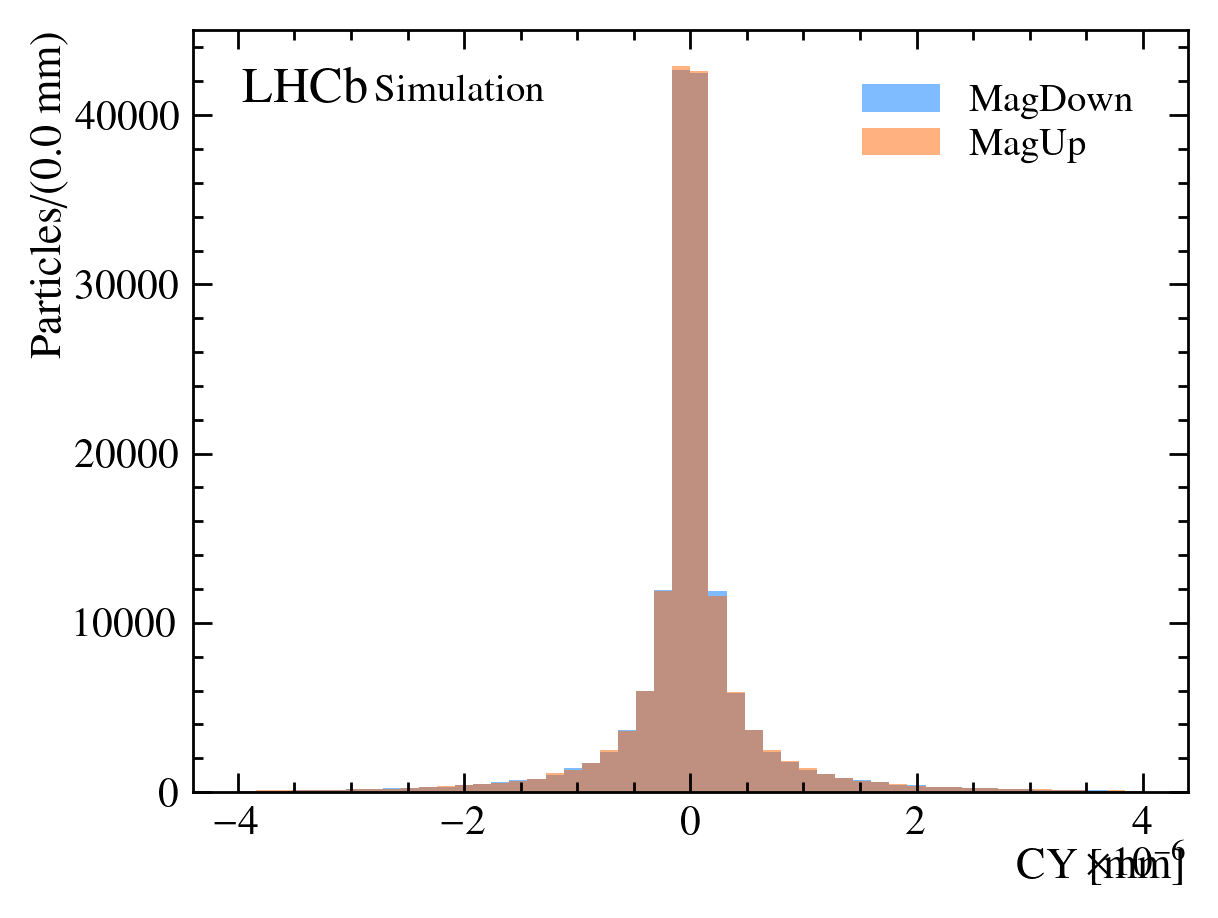

In [12]:
import matplotlib.pyplot as plt
import mplhep
mplhep.style.use(["LHCbTex2"])
default_args = dict(
    alpha=0.5
)

variables = {
    "z_mag_x": dict(
        range=(5100, 5600),
        label="z_mag_x",
        unit="mm",
        bins=50,
    ),
    "z_mag_y": dict(
        range=(2000, 10000),
        label="z_mag_y",
        unit="mm",
        bins=50,
    ),
    "AX": dict(
        range=(-3000, 3000),
        label="AX",
        unit="mm",
        bins=50,
    ),
    "BX": dict(
        range=(-1.2, 1.2),
        label="BX",
        unit="1/mm",
        bins=50,
    ),
    "CX": dict(
        range=(-7e-6, 7e-6),
        label="CX",
        unit="1/mm",
        bins=50,
    ),
    "DX": dict(
        range=(-7e-9, 7e-9),
        label="DX",
        unit="1/mm",
        bins=50,
    ),
    "AY": dict(
        range=(-2500, 2500),
        label="AY",
        unit="mm",
        bins=50,
    ),
    "BY": dict(
        range=(-0.4, 0.4),
        label="BY",
        unit="mm",
        bins=50,
    ),
    "CY": dict(
        range=(-4e-6, 4e-6),
        label="CY",
        unit="mm",
        bins=50,
    ),
}
for name in variables.keys():
    plt.figure()
    n, bins, patches = plt.hist(
        array_md[name],
        bins=variables[name]["bins"],
        **default_args,
        range=variables[name]["range"],
        label="MagDown"
    )
    plt.hist(array_mu[name], bins=variables[name]["bins"],
        **default_args, 
        range=variables[name]["range"], label="MagUp")

    label = variables[name]["label"]
    unit = variables[name]["unit"]
    bin_width = "%.1f" % round(bins[1] - bins[0], 1)
    plt.xlabel(f"{label} [{unit}]")
    plt.ylabel(f"Particles/({bin_width} {unit})")
    mplhep.lhcb.text("Simulation")
    plt.legend()


